# SARIMA
- Air Quality Data in India
- https://www.kaggle.com/rohanrao/air-quality-data-in-india
- city_day.csv

## Setting up

In [1]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
# kpss_test
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

# Data preparation

## Load data

In [34]:
import pandas as pd
df_all = pd.read_csv('city_day.csv')
df_all.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [35]:
# Filter only Delhi
df_delhi = df_all.loc[df_all['City'] == 'Delhi'].copy()
df_delhi.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [36]:
# Choose 2 columns
df_delhi = df_delhi[['Date','AQI']]
df_delhi.head()

,Date,AQI
10229,2015-01-01,472.0
10230,2015-01-02,454.0
10231,2015-01-03,143.0
10232,2015-01-04,319.0
10233,2015-01-05,325.0


In [37]:
# Set index
df_delhi['Date'] = pd.to_datetime(df_delhi['Date'])
df = df_delhi.set_index('Date')
df.head()

,AQI
Date,
2015-01-01,472.0
2015-01-02,454.0
2015-01-03,143.0
2015-01-04,319.0
2015-01-05,325.0


In [38]:
df.describe()

,AQI
count,1999.000000
mean,259.487744
std,119.537333
min,29.000000
25%,161.500000
50%,257.000000
75%,345.500000
max,716.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AQI     1999 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


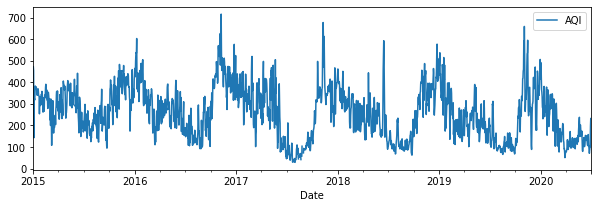

In [40]:
import matplotlib.pyplot as plt
df.plot(figsize=(10, 3))
plt.show()

## Resample data

In [41]:
max_sample = -1
df_avg = df['AQI'].resample('MS').mean()
if max_sample > 0:
    df_avg = df_avg.iloc[-max_sample-1:-1]
display(df_avg.describe())

count     67.000000
mean     256.567758
std      101.041505
min       67.161290
25%      181.160753
50%      258.178571
75%      339.709677
max      474.833333
Name: AQI, dtype: float64

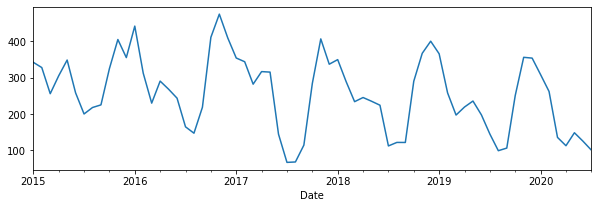

In [10]:
df_avg.plot(figsize=(10, 3))
plt.show()

C:\Users\admin\miniconda3\envs\pythonclass\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


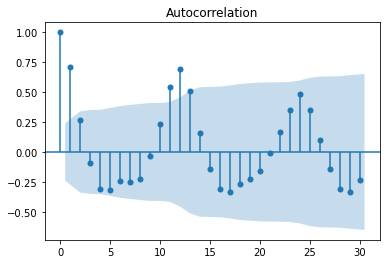

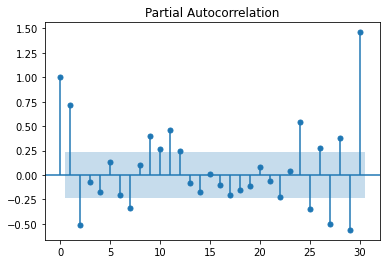

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_avg, lags=30)
plot_pacf(df_avg, lags=30)
plt.show()

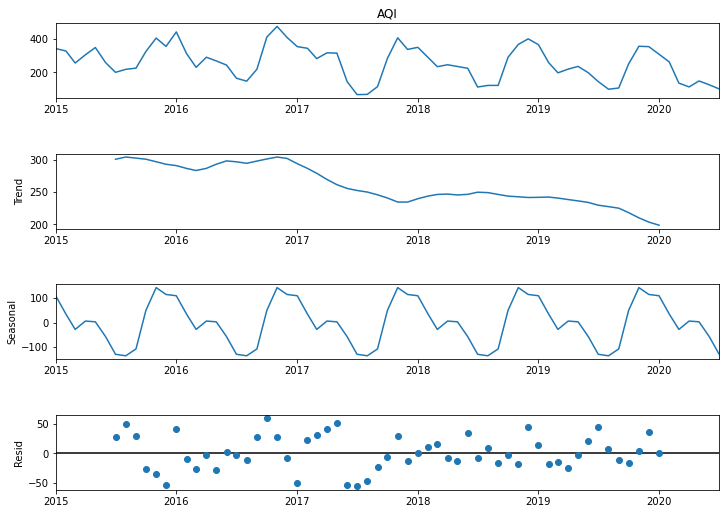

In [12]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df_avg, model='additive')
fig = decomposition.plot()
fig.set_size_inches(11,8)

In [13]:
adf_test(df_avg)
kpss_test(df_avg)

Results of Dickey-Fuller Test:
Test Statistic                  0.229024
p-value                         0.973843
#Lags Used                     11.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64
Results of KPSS Test:
Test Statistic            0.650669
p-value                   0.018030
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
C:\Users\admin\miniconda3\envs\pythonclass\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length select

## Test for stationariy and seasonality

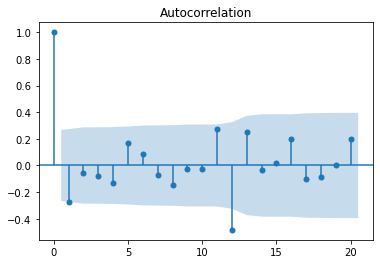

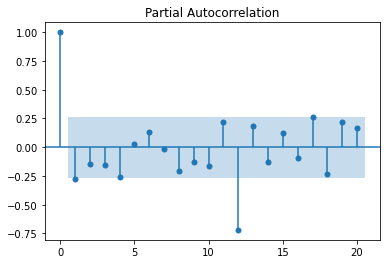

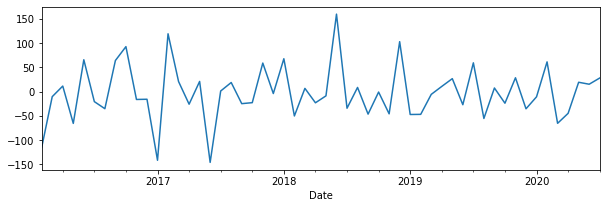

Results of Dickey-Fuller Test:
Test Statistic                 -4.574674
p-value                         0.000144
#Lags Used                     11.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64
Results of KPSS Test:
Test Statistic            0.143964
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
C:\Users\admin\miniconda3\envs\pythonclass\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length select

In [14]:
df_diff = df_avg.diff(1).diff(12).dropna()
plot_acf(df_diff, lags=20)
plot_pacf(df_diff, lags=20)
fig, ax = plt.subplots(figsize=(10, 3))
df_diff.plot(ax=ax)
plt.show()
adf_test(df_diff)
kpss_test(df_diff)

# Model selection

In [15]:
import itertools
p = [0,1,2]
d = [1]
q = [0,1,2]
P = [0,1]
D = [1]
Q = [0,1]
lag = [12]
params = list(itertools.product(p, d, q, P, D, Q, lag))
print(f"Number of models to test: {len(params)}")

Number of models to test: 36


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
df_results = pd.DataFrame()
for param in params:
    pdq = param[0:3]
    PDQL = param[3:7]
    try:
        mod = SARIMAX(df_avg, order=pdq, seasonal_order=PDQL)
        results = mod.fit(method = 'powell',start_params=np.random.random(7))
        data = {'param': pdq, 'param_seasonal': PDQL, 'AIC':results.aic }
        df_results = df_results.append(data, ignore_index=True)
    except:
        continue
df_results = df_results.sort_values(by='AIC',ascending=True)

Optimization terminated successfully.
         Current function value: 4.402021
         Iterations: 2
         Function evaluations: 190
Optimization terminated successfully.
         Current function value: 4.245553
         Iterations: 2
         Function evaluations: 253
Optimization terminated successfully.
         Current function value: 4.254062
         Iterations: 4
         Function evaluations: 368
Optimization terminated successfully.
         Current function value: 4.362148
         Iterations: 3
         Function evaluations: 293
Optimization terminated successfully.
         Current function value: 4.347843
         Iterations: 2
         Function evaluations: 188
Optimization terminated successfully.
         Current function value: 4.732218
         Iterations: 2
         Function evaluations: 249
Optimization terminated successfully.
         Current function value: 4.262471
         Iterations: 3
         Function evaluations: 275
Optimization terminated successful

In [17]:
df_results

,AIC,param,param_seasonal
15,14.000000,"(1, 1, 0)","(1, 1, 1, 12)"
29,572.834639,"(2, 1, 2)","(1, 1, 0, 12)"
9,575.394430,"(0, 1, 2)","(0, 1, 1, 12)"
10,575.956318,"(0, 1, 2)","(1, 1, 0, 12)"
21,579.034261,"(1, 1, 2)","(0, 1, 1, 12)"
19,580.884513,"(1, 1, 1)","(1, 1, 1, 12)"
13,581.786655,"(1, 1, 0)","(0, 1, 1, 12)"
30,581.855931,"(2, 1, 2)","(1, 1, 1, 12)"
25,582.154034,"(2, 1, 0)","(1, 1, 0, 12)"
17,582.578597,"(1, 1, 1)","(0, 1, 1, 12)"


# Model training

In [18]:
rank = 1
pdq = df_results.iloc[rank-1,1]
PDQL = df_results.iloc[rank-1,2]

print(f"Using ({pdq[0]},{pdq[1]},{pdq[2]})({PDQL[0]},{PDQL[1]},{PDQL[2]},{PDQL[3]})")

mod = SARIMAX(df_avg, order=pdq, seasonal_order=PDQL)
results = mod.fit(method = 'powell', start_params=np.random.random(7))

Using (1,1,0)(1,1,1,12)
Optimization terminated successfully.
         Current function value: 4.235397
         Iterations: 4
         Function evaluations: 400


# Model evaluation

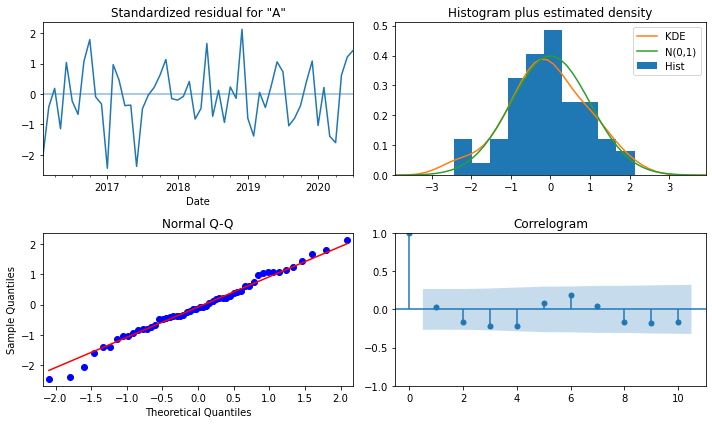

In [19]:
fig = results.plot_diagnostics(figsize=(10, 6))
fig.tight_layout()

In [20]:
pred = results.get_prediction(start=df_avg.index[1], end=df_avg.index[-1], dynamic=False)
comb = pd.concat([df_avg, pred.predicted_mean], axis=1).dropna()
comb['error'] = comb.iloc[:,0] - comb.iloc[:,1]
comb['percentage'] = comb['error']/comb.iloc[:,0]*100

MAE = comb['error'].abs().mean()
RMSE = np.sqrt((comb['error']**2).mean())
MAPE = comb['percentage'].abs().mean()

print(f"Mean absolute error: {MAE:6.3f}")
print(f"Root mean squared error: {RMSE:6.3f}")
print(f"Mean absolute percentage error: {MAPE:6.3f}")

Mean absolute error: 40.423
Root mean squared error: 51.151
Mean absolute percentage error: 18.444


# Plotting and forecasting

In [21]:
num_forecast = 10

start_dt = df_avg.index[10]
end_dt_data = df_avg.index[-1]
if num_forecast > 0:
    end_dt = end_dt_data + num_forecast * end_dt_data.freq
else:
    end_dt = end_dt_data

print(start_dt)
print(end_dt)

2015-11-01 00:00:00
2021-05-01 00:00:00


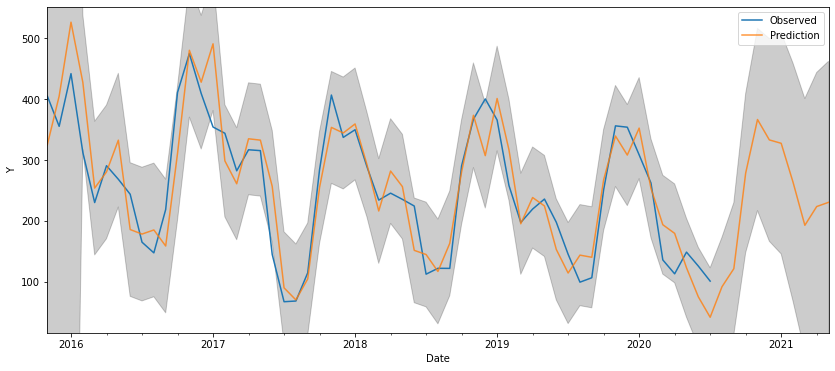

In [55]:
pred = results.get_prediction(start=pd.to_datetime(start_dt), end=pd.to_datetime(end_dt), dynamic=False)
pred_ci = pred.conf_int()
ax = df_avg.plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Prediction', alpha=.8, figsize=(14, 6))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Y')
ax.set_xlim(start_dt,end_dt)
yp_max = pred.predicted_mean.max()
yp_min = pred.predicted_mean.min()
yp_mean = pred.predicted_mean.mean()
ax.set_ylim(yp_min-0.1*yp_mean,yp_max+0.1*yp_mean)
plt.legend()
plt.show()

In [54]:
pred.predicted_mean.min()*0.9

37.458513363118904

In [23]:
if num_forecast > 0:
    display(pred.predicted_mean.loc[end_dt_data:end_dt])

2020-07-01     41.620570
2020-08-01     91.799599
2020-09-01    121.452057
2020-10-01    278.494558
2020-11-01    366.521599
2020-12-01    333.008931
2021-01-01    327.448763
2021-02-01    263.614857
2021-03-01    192.729723
2021-04-01    223.534781
2021-05-01    230.444952
Freq: MS, Name: predicted_mean, dtype: float64